<h1>Capstone Data Science Project Notebook</h1> 

<h2> I. Introduction/Business Problem</h2>

<p>In the United States, traffic accidents involving motor vehicles cause over 100 deaths per day, and are leading cause of death in the US, as reported by the Center for Desease Control and Prevention <a href="https://www.cdc.gov/motorvehiclesafety/costs/index.html">(CDC)</a>. In addition to the cost of human life, there is an enourmous impact economic impact as well, which exceeds $75 billion for the cost of related productivity losses and medical care.</p>  
<p>This project seeks to explor a range of factors that may affect the severity of automobile accidents. For the purpost of this project, and given the 3rd-party data used for analysis, "severity" is to be understood as teh impact on the traffic as measuresd by the lenght of the traffic delay casued by the accident. Insights from this project would be particularly useful to city transportation, safety, and zoning departments.</p> 

<p>The data being used for this project is from a dataset made available through the research from the following papers:</p>
  <ul>
    <li>Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, arXiv preprint arXiv:1906.05409 (2019).</li>
    <li>Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. “Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.” In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.</li>
  </ul>
<p>The data was collected between February 2016 and June 2020, includes approximately 3.5 million traffic accidents, and was collected from 49 states in the US. The dataset includes attributes that detail:</p>
  <ul>
    <li>weather conditions (i.e. temperature, precipitation, wind speed, etc.),</li>
    <li>location information (i.e., coordinates, street address, city, state),</li>
    <li>points of interest nearby the traffic accident (i.e., crossing, speed bump, station, railway, stop, traffic signal),</li> 
  </ul>
<p>and other attributes pertaining to the observed traffic accidents.</p>
<p>By understanding what factors contribute to more severe accidents, city officials would be able to plan better and safer cities, and more effectively deploy city resources in response to traffic accidents. If there are patterns to location, weather condition, and points of interest around traffic accidents, then city officials would be better able to address this and related issues.</p>
<p>(end of week 2 submission)</p>

<h3>Importing and Cleaning</h3>

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    attrs-20.2.0               |     pyh9f0ad1d_0          41 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-3.1           |   py36h45558ae

In [4]:
pwd

'/resources/labs/datascience_certification/scripts'

<h1> importing the data </h1>

In [5]:
df = pd.read_csv('US_Accidents_June20.csv')

print("file read to dataframe")

file read to dataframe


In [7]:
df.head()

AttributeError: 'NoneType' object has no attribute 'items'

    ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  MapQuest  201.0         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  MapQuest  201.0         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  MapQuest  201.0         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  MapQuest  201.0         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   
1  39.928059 -82.831184      NaN      NaN  ...       False   False  False   
2  39.063148 -84.032608      NaN      NaN  ...       False   False  False   
3  39.747753 -84.205582      NaN      NaN  ...       False   False  False   
4  39.627781 -84.188354      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset C

<h3> data observations: check correlation for binary attributes </h3>
<p> - see which "night" attribute has the highest correlation, drop the rest</p>
<p> - check environment features </p>

In [8]:
df.drop(['Source', 'TMC', 'Description','Country','Timezone', 'Airport_Code', 'Weather_Timestamp'], axis=1, inplace=True)
print('dropped boring columns')

dropped boring columns


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 42 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Number                 float64
 10  Street                 object 
 11  Side                   object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Temperature(F)         float64
 17  Wind_Chill(F)          float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Wind_Speed(mph)   

<h3> Data cleaning to do:</h3>
<ol>
    <li>make sure time is in correct date/time format</li>
    <li>transform day/night attributes into binary ones</li>
    <li>transform bool attributes into binary ones</li>
    <li>explore street-level data</li>
</ol>

In [8]:
df['Sunrise_Sunset'].replace(to_replace=['Day','Night'], value=[0,1],inplace=True)
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,NaN,...,False,False,False,False,False,False,1.0,Night,Night,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,2584.0,...,False,False,False,False,False,False,1.0,Night,Night,Day
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,NaN,...,False,False,False,False,True,False,1.0,Night,Day,Day
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,NaN,...,False,False,False,False,False,False,1.0,Day,Day,Day
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,NaN,...,False,False,False,False,True,False,0.0,Day,Day,Day


In [9]:
df[['Sunrise_Sunset', 'Severity']].corr()

,Sunrise_Sunset,Severity
Sunrise_Sunset,1.000000,0.061988
Severity,0.061988,1.000000


In [10]:
df['Civil_Twilight'].replace(to_replace=['Day','Night'], value=[0,1],inplace=True)
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,NaN,...,False,False,False,False,False,False,1.0,1.0,Night,Night
1,A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,2584.0,...,False,False,False,False,False,False,1.0,1.0,Night,Day
2,A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,NaN,...,False,False,False,False,True,False,1.0,1.0,Day,Day
3,A-4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,NaN,...,False,False,False,False,False,False,1.0,0.0,Day,Day
4,A-5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,NaN,...,False,False,False,False,True,False,0.0,0.0,Day,Day


In [11]:
df[['Civil_Twilight', 'Severity']].corr()

,Civil_Twilight,Severity
Civil_Twilight,1.000000,0.068613
Severity,0.068613,1.000000


<h2> Day vs Night doesn't seem to have an effect on accident severity </h2>

<h3> let's look at weather conditions  </h3>

In [27]:
df['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow',

<p> 'Weather_Conditions' attribute has A TON of object types, so I'll check int and str type attributes instead </p>

In [28]:
df[['Temperature(F)', 'Severity']].corr()

,Temperature(F),Severity
Temperature(F),1.000000,-0.027275
Severity,-0.027275,1.000000


In [29]:
df[['Precipitation(in)', 'Severity']].corr()

,Precipitation(in),Severity
Precipitation(in),1.00000,0.01784
Severity,0.01784,1.00000


In [30]:
df[['Wind_Speed(mph)', 'Severity']].corr()

,Wind_Speed(mph),Severity
Wind_Speed(mph),1.000000,0.034959
Severity,0.034959,1.000000


In [31]:
df[['Visibility(mi)', 'Severity']].corr()

,Visibility(mi),Severity
Visibility(mi),1.000000,-0.006433
Severity,-0.006433,1.000000


<h3> perhaps there's low correlation with all of these because they're all accidents, and there aren't any observiations without an accident incidence. However, we might just need to clean the data more </h3> 

(0.0, 4.15)

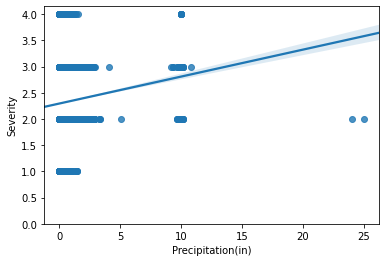

In [34]:
sns.regplot(x="Precipitation(in)", y="Severity", data=df)
plt.ylim(0,)

In [48]:
df.groupby(['Severity'])['Weather_Condition'].value_counts()

Severity  Weather_Condition           
1         Fair                            13978
          Mostly Cloudy                    4818
          Cloudy                           3538
          Partly Cloudy                    2747
          Light Rain                       1431
                                          ...  
4         Light Snow with Thunder             1
          Light Thunderstorms and Snow        1
          Rain Showers                        1
          Sand / Dust Whirlwinds              1
          Squalls                             1
Name: Weather_Condition, Length: 363, dtype: int64

In [ ]:
sns.regplot(x="Temperature(F)", y="Severity", data=df)
plt.ylim(0,)